<a href="https://colab.research.google.com/github/VintageGold/Text_Summarization/blob/main/Data_cleaning/Text_Summarization_liang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import json
import pandas as pd
import string
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load Data

In [ ]:
df_metadata = pd.read_csv('/content/gdrive/My Drive/Text_Summarization/Telehealth_article.csv',dtype={'Index':'object'},index_col='Index')

In [ ]:
df_metadata

,Unnamed: 0,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content
Index,,,,,,,,,
1,0,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...
2,1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...
3,2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig..."
4,3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...
5,4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the..."
6,5,American Psychologist,The COVID-19 Telepsychology Revolution: A Nati...,2021,Bradford S. Pierce; Paul B. Perrin; Carmen M. ...,The COVID-19 pandemic has altered mental healt...,"KEYWORDS:\n\ntelepsychology, COVID-19, telemed...","Pierce, B. S., Perrin, P. B., Tyler, C. M., Mc...","In early January of 2020, Chinese health autho..."
7,6,Psychological Services,Pre-COVID-19 Deterrents to Practicing With Vid...,2020,Bradford S. Pierce; Paul B. Perrin; Scott D. M...,Telepsychology has the potential to help menta...,"KEYWORDS:\n\ntelepsychology, telehealth, telem...","Pierce, B. S., Perrin, P. B., & McDonald, S. D...",Millions of people with a diagnosable mental d...
8,7,Canadian Psychology/Psychologie canadienne,"COVID-19 and Telemental Health: Benefits, Chal...",2020,Sheri Madigan; Nicole Racine; Jessica E. Cooke...,Although the medical impacts of COVID-19 are n...,"KEYWORDS:\n\ntelemental health, telepsychology...","Madigan, S., Racine, N., Cooke, J. E., & Korcz...",The primary focus of COVID-19 has been on its ...
9,8,Psychological Assessment,"Equivalence of Remote, Digital Administration ...",2020,A. Jordan Wright,Many children in need do not receive the psych...,"KEYWORDS:\n\npsychoeducational evaluation, tel...","Wright, A. J. (2020). Equivalence of remote, d...",There is a worldwide gap between the mental he...


# Clean Data
1.   Lowercase
2.   Remove Punctuation
3.   White Spaces



In [ ]:
def clean_text(text,lowercase=True):
    
    corpus =  text
    
    if lowercase:
        corpus = text.lower()

    translator = str.maketrans("","",string.punctuation + "\n" + "\tb")
    
    clean_corpus = corpus.translate(translator)
    
    remove_extra_whitespaces = [token.strip() for token in clean_corpus.split()]

    return ' '.join(remove_extra_whitespaces)

In [ ]:
df_metadata['Content_Clean'] = df_metadata['Content'].apply(lambda text: clean_text(text))
df_metadata['Content_Length'] = df_metadata['Content_Clean'].apply(lambda text: len(text))
df_metadata['Abstract_Length'] = df_metadata['Abstract'].apply(lambda text: len(str(text)))
df_metadata["Parsed_Keywords"] = df_metadata["Keywords"].apply(lambda keywords: str(keywords).replace("\n\n"," ").split(" ")[1:])
df_metadata['Parsed_Keywords_Length'] = df_metadata['Parsed_Keywords'].apply(lambda text: len(text))

In [ ]:
df_metadata.to_csv('/content/gdrive/My Drive/Text_Summarization/Telehealth_article_1.csv')

In [ ]:
df_metadata.head()

,Unnamed: 0,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Clean,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length
Index,,,,,,,,,,,,,,
1,0,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,veterans face a variety of stressors related t...,35996,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5
2,1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,the impact of the covid19 pandemic on the chil...,71152,1577,"[remote, child, custody, evaluations,, videoco...",10
3,2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",in novemer 2019 covid19—the infectious highly ...,60855,1842,"[forensic, e-mental, health,, telehealth,, tel...",8
4,3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,anxiety and depressive disorders are among the...,29089,1650,"[education, and, training,, telepsychology,, C...",6
5,4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",in midmarch 2020 the authors—as well as the ma...,40983,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6


In [ ]:
df_metadata.dtypes

Unnamed: 0                 int64
Journal Title             object
Article Title             object
Date Published             int64
Authors                   object
Abstract                  object
Keywords                  object
Citation                  object
Content                   object
Content_Clean             object
Content_Length             int64
Abstract_Length            int64
Parsed_Keywords           object
Parsed_Keywords_Length     int64
dtype: object

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 12.3MB/s 


In [ ]:
def vader_sentiment_scores(text): 
  
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA_obj = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
    # Contains pos, neg, neu, and compound scores.
 
    polarity_dict = SIA_obj.polarity_scores(text) 
      
    #print("Raw sentiment dictionary : ", polarity_dict) 
    #print("polarity percentage of sentence ", polarity_dict['neg']*100, "% :: Negative") 
    #print("polarity percentage of sentence ", polarity_dict['neu']*100, "% :: Neutral") 
    #print("polarity percentage of sentence ", polarity_dict['pos']*100, "% :: Positive") 
  
    print("Overall polarity percentage of sentence", end = " : ") 
  
    # Calculate overall sentiment by compound score
    if polarity_dict['compound'] >= 0.05 : 
        print("Positive")
        return "Positive"
  
    elif polarity_dict['compound'] <= - 0.05 : 
        print("Negative") 
        return "Negative"
    else : 
        print("Neutral")
        return "Neutral"

In [ ]:
df_metadata['Content_Clean'][1].lower()

'veterans face a variety of stressors related to their military service institute of medicine 2014 tanielian et al 2008 most veterans who return from military conflict do not have a mental health condition ut all veterans “experience a period of readjustment as they reintegrate into life with family friends and community” sustance ause and mental health services administration samhsa 2012 p 1 tanielian et al 2008 those individuals must juggle a variety of sometimes conflicting family and militaryrelated responsiilities learn to readjust to environments where ehaviors associated with a constant state of readiness are no longer needed and process comatrelated exposure that may collectively contriute to prolems for oth veterans and their families institute of medicine 2014 samhsa 2012veterans who are exposed to comat are more likely to report normal reactions to stress including depression hopelessness insomnia nightmares feelings of rejection aggressive ehavior and sustance misuse samhsa

In [ ]:
import nltk
nltk.download('vader_lexicon')

for i in range(len(df_metadata)) :
  
    sentiment = vader_sentiment_scores(df_metadata.loc[i+1, "Content_Clean"])
    print(sentiment)
    df_metadata.loc[i+1, "Sentiments"] = sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
Overall polarity percentage of sentence : Negative
Negative
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of s

In [ ]:
df_metadata.head()

,Unnamed: 0,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Clean,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Sentiments
Index,,,,,,,,,,,,,,,
1,0,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,veterans face a variety of stressors related t...,35996,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Negative
2,1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,the impact of the covid19 pandemic on the chil...,71152,1577,"[remote, child, custody, evaluations,, videoco...",10,Positive
3,2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",in novemer 2019 covid19—the infectious highly ...,60855,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Positive
4,3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,anxiety and depressive disorders are among the...,29089,1650,"[education, and, training,, telepsychology,, C...",6,Positive
5,4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",in midmarch 2020 the authors—as well as the ma...,40983,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Positive


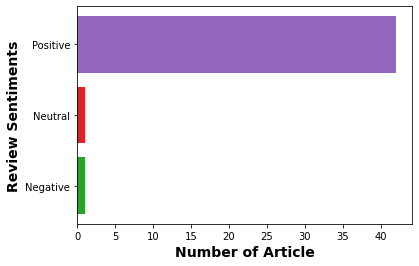

In [ ]:
Sentiment_count=df_metadata.groupby('Sentiments').count()
plt.barh(Sentiment_count.index.values, Sentiment_count['Article Title'], color=['C2', 'C3', 'C4'])
plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
plt.xlabel('Number of Article', fontweight= 'bold', fontsize = '14')
plt.show()

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_metadata['Polarity'] = df_metadata['Content_Clean'].apply(pol)
df_metadata['Subjectivity'] = df_metadata['Content_Clean'].apply(sub)
df_metadata.head()

,Unnamed: 0,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Clean,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Sentiments,Polarity,Subjectivity
Index,,,,,,,,,,,,,,,,,
1,0,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,veterans face a variety of stressors related t...,35996,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Negative,0.080116,0.418593
2,1,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,the impact of the covid19 pandemic on the chil...,71152,1577,"[remote, child, custody, evaluations,, videoco...",10,Positive,0.094999,0.425968
3,2,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",in novemer 2019 covid19—the infectious highly ...,60855,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Positive,0.042005,0.392394
4,3,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,anxiety and depressive disorders are among the...,29089,1650,"[education, and, training,, telepsychology,, C...",6,Positive,0.105784,0.447756
5,4,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",in midmarch 2020 the authors—as well as the ma...,40983,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Positive,0.114111,0.454020


## keywords

In [ ]:
keyword_list = [word for word in df_metadata['Parsed_Keywords'][:]]
keyword_list

[['telepsychology,',
  'meta-analysis,',
  'veteran,',
  'videoconference,',
  'phone'],
 ['remote',
  'child',
  'custody',
  'evaluations,',
  'videoconferencing,',
  'telemental',
  'health,',
  'ethics',
  'in',
  'telepsychology'],
 ['forensic',
  'e-mental',
  'health,',
  'telehealth,',
  'telepsychology,',
  'forensic',
  'evaluation,',
  'corrections'],
 ['education', 'and', 'training,', 'telepsychology,', 'COVID-19,', 'pandemic'],
 ['remote', 'psychotherapy,', 'Covid-19,', 'pandemic,', 'mixed', 'method'],
 ['telepsychology,',
  'COVID-19,',
  'telemedicine,',
  'telehealth,',
  'health',
  'care',
  'delivery'],
 ['telepsychology,', 'telehealth,', 'telemedicine,', 'barriers'],
 ['telemental', 'health,', 'telepsychology,', 'mental', 'health'],
 ['psychoeducational',
  'evaluation,',
  'telepsychology,',
  'online',
  'testing,',
  'Wechsler',
  'Intelligence',
  'Scale',
  'for',
  'Children–V,',
  'test',
  'administration'],
 ['telepsychotherapy,',
  'telemental',
  'health,

In [ ]:
keyword_new = []
for word in keyword_list:
  keyword_new.extend(word)

In [ ]:
keyword_new

['telepsychology,',
 'meta-analysis,',
 'veteran,',
 'videoconference,',
 'phone',
 'remote',
 'child',
 'custody',
 'evaluations,',
 'videoconferencing,',
 'telemental',
 'health,',
 'ethics',
 'in',
 'telepsychology',
 'forensic',
 'e-mental',
 'health,',
 'telehealth,',
 'telepsychology,',
 'forensic',
 'evaluation,',
 'corrections',
 'education',
 'and',
 'training,',
 'telepsychology,',
 'COVID-19,',
 'pandemic',
 'remote',
 'psychotherapy,',
 'Covid-19,',
 'pandemic,',
 'mixed',
 'method',
 'telepsychology,',
 'COVID-19,',
 'telemedicine,',
 'telehealth,',
 'health',
 'care',
 'delivery',
 'telepsychology,',
 'telehealth,',
 'telemedicine,',
 'barriers',
 'telemental',
 'health,',
 'telepsychology,',
 'mental',
 'health',
 'psychoeducational',
 'evaluation,',
 'telepsychology,',
 'online',
 'testing,',
 'Wechsler',
 'Intelligence',
 'Scale',
 'for',
 'Children–V,',
 'test',
 'administration',
 'telepsychotherapy,',
 'telemental',
 'health,',
 'telehealth,',
 'COVID-19,',
 'pandem

In [ ]:
keyword_new_2 = [i.replace(i, re.sub(r'\W', '', i)) for i in keyword_new]

In [ ]:
keyword_new_2

['telepsychology',
 'metaanalysis',
 'veteran',
 'videoconference',
 'phone',
 'remote',
 'child',
 'custody',
 'evaluations',
 'videoconferencing',
 'telemental',
 'health',
 'ethics',
 'in',
 'telepsychology',
 'forensic',
 'emental',
 'health',
 'telehealth',
 'telepsychology',
 'forensic',
 'evaluation',
 'corrections',
 'education',
 'and',
 'training',
 'telepsychology',
 'COVID19',
 'pandemic',
 'remote',
 'psychotherapy',
 'Covid19',
 'pandemic',
 'mixed',
 'method',
 'telepsychology',
 'COVID19',
 'telemedicine',
 'telehealth',
 'health',
 'care',
 'delivery',
 'telepsychology',
 'telehealth',
 'telemedicine',
 'barriers',
 'telemental',
 'health',
 'telepsychology',
 'mental',
 'health',
 'psychoeducational',
 'evaluation',
 'telepsychology',
 'online',
 'testing',
 'Wechsler',
 'Intelligence',
 'Scale',
 'for',
 'ChildrenV',
 'test',
 'administration',
 'telepsychotherapy',
 'telemental',
 'health',
 'telehealth',
 'COVID19',
 'pandemic',
 'MMPI',
 'telehealth',
 'telepracti

In [ ]:
keyword_new_3 = [set(keyword_new_2)]

In [ ]:
keyword_new_3

[{'2019',
  'Affairs',
  'American',
  'COPD',
  'COVID19',
  'ChildrenV',
  'Covid19',
  'Indian',
  'Intelligence',
  'Internet',
  'MMPI',
  'NSA',
  'North',
  'Scale',
  'Veterans',
  'Wechsler',
  'administration',
  'adolescents',
  'alliance',
  'and',
  'anxiety',
  'asynchronous',
  'attitudes',
  'barriers',
  'based',
  'behavior',
  'behavioral',
  'boundaries',
  'brain',
  'care',
  'caregivers',
  'child',
  'children',
  'client',
  'clinical',
  'clinicians',
  'commentary',
  'competence',
  'competency',
  'conduct',
  'confidentiality',
  'corona',
  'coronavirus',
  'corrections',
  'custody',
  'cyberpsychology',
  'data',
  'delivered',
  'delivery',
  'depression',
  'digital',
  'disaster',
  'disease',
  'disorder',
  'disparitiestelepsychologyintegrated',
  'disruptive',
  'dissemination',
  'education',
  'emental',
  'engagement',
  'ethics',
  'evaluation',
  'evaluations',
  'familybased',
  'farmers',
  'for',
  'forensic',
  'global',
  'guided',
  'gu

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import nltk
#from nltk import word_tokenize
from nltk.stem import	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#for w in keyword_new_2:
	  #wordnet_lemmatizer.lemmatize(w)

In [ ]:
keyword_new_3 = [wordnet_lemmatizer.lemmatize(w) for w in keyword_new_2]

In [ ]:
len(keyword_new_3)

304

In [ ]:
len(set(keyword_new_3))

142

In [ ]:
set(keyword_new_3)

{'2019',
 'Affairs',
 'American',
 'COPD',
 'COVID19',
 'ChildrenV',
 'Covid19',
 'Indian',
 'Intelligence',
 'Internet',
 'MMPI',
 'NSA',
 'North',
 'Scale',
 'Veterans',
 'Wechsler',
 'administration',
 'adolescent',
 'alliance',
 'and',
 'anxiety',
 'asynchronous',
 'attitude',
 'barrier',
 'based',
 'behavior',
 'behavioral',
 'boundary',
 'brain',
 'care',
 'caregiver',
 'child',
 'client',
 'clinical',
 'clinician',
 'commentary',
 'competence',
 'competency',
 'conduct',
 'confidentiality',
 'corona',
 'coronavirus',
 'correction',
 'custody',
 'cyberpsychology',
 'data',
 'delivered',
 'delivery',
 'depression',
 'digital',
 'disaster',
 'disease',
 'disorder',
 'disparitiestelepsychologyintegrated',
 'disruptive',
 'dissemination',
 'education',
 'emental',
 'engagement',
 'ethic',
 'evaluation',
 'familybased',
 'farmer',
 'for',
 'forensic',
 'global',
 'guided',
 'guideline',
 'health',
 'help',
 'immigrationLatinxhealth',
 'implementation',
 'in',
 'injury',
 'interjurisdi

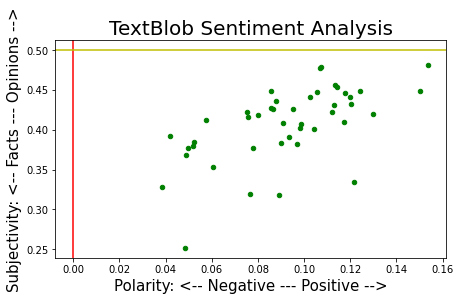

In [ ]:
import matplotlib.pyplot as plt

df_metadata.plot.scatter(x ='Polarity', y ='Subjectivity', color = 'green', figsize =[7, 4])    
plt.title('TextBlob Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity: <-- Negative --- Positive -->', fontsize=15)
plt.ylabel('Subjectivity: <-- Facts --- Opinions -->', fontsize=15)
plt.axvline(0.0, color = 'r')
plt.axhline(0.5, color = 'y')
    
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df_metadata['Content_Clean'])

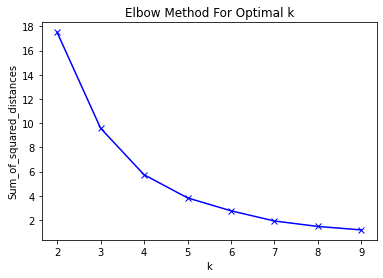

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
  km = KMeans(n_clusters=k, max_iter=200, n_init=10)
  km = km.fit(X.reshape(-1,1))
  Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk import word_tokenize
from textblob import TextBlob

In [39]:
token= RegexpTokenizer(r'\w+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize )
text_counts= cv.fit_transform(df_metadata['Content_Clean'])

print(cv.vocabulary_)

{'veterans': 13688, 'face': 4884, 'variety': 13637, 'stressors': 12221, 'related': 10583, 'military': 7989, 'service': 11506, 'institute': 6523, 'medicine': 7875, '2014': 357, 'tanielian': 12582, 'et': 4606, 'al': 1287, '2008': 293, 'return': 10878, 'conflict': 2784, 'mental': 7904, 'health': 5814, 'condition': 2742, 'ut': 13566, 'experience': 4782, 'period': 9260, 'readjustment': 10352, 'reintegrate': 10575, 'life': 7364, 'family': 4958, 'friends': 5310, 'community': 2574, 'sustance': 12461, 'ause': 1866, 'services': 11508, 'administration': 1120, 'samhsa': 11160, '2012': 328, 'p': 8991, '1': 52, 'individuals': 6386, 'juggle': 6953, 'conflicting': 2786, 'militaryrelated': 7990, 'responsiilities': 10822, 'learn': 7254, 'readjust': 10351, 'environments': 4514, 'ehaviors': 4217, 'associated': 1759, 'constant': 2881, 'state': 12093, 'readiness': 10348, 'longer': 7511, 'needed': 8331, 'process': 9864, 'comatrelated': 2516, 'exposure': 4830, 'collectively': 2498, 'contriute': 2975, 'prolems

In [40]:
print(text_counts)

  (0, 13688)	47
  (0, 4884)	2
  (0, 13637)	5
  (0, 12221)	1
  (0, 10583)	6
  (0, 7989)	3
  (0, 11506)	4
  (0, 6523)	2
  (0, 7875)	2
  (0, 357)	6
  (0, 12582)	8
  (0, 4606)	50
  (0, 1287)	50
  (0, 293)	9
  (0, 10878)	1
  (0, 2784)	4
  (0, 7904)	30
  (0, 5814)	34
  (0, 2742)	7
  (0, 13566)	5
  (0, 4782)	4
  (0, 9260)	2
  (0, 10352)	1
  (0, 10575)	1
  (0, 7364)	2
  :	:
  (43, 566)	1
  (43, 2746)	1
  (43, 7197)	1
  (43, 7066)	2
  (43, 325)	1
  (43, 9086)	1
  (43, 13072)	1
  (43, 14083)	1
  (43, 13579)	1
  (43, 11957)	1
  (43, 2080)	1
  (43, 2596)	1
  (43, 4383)	1
  (43, 7074)	1
  (43, 8982)	1
  (43, 7864)	1
  (43, 12608)	2
  (43, 1466)	1
  (43, 6323)	1
  (43, 3915)	1
  (43, 3760)	1
  (43, 390)	1
  (43, 13959)	1
  (43, 9736)	1
  (43, 13514)	1


In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(text_counts)
print(tfidf_transformer,"\n")

reviews_tfidf = tfidf_transformer.transform(text_counts)
print(reviews_tfidf)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True) 

  (0, 14212)	0.007964182023835439
  (0, 14173)	0.005066811336730938
  (0, 14164)	0.07223805306903215
  (0, 14116)	0.00852002532389917
  (0, 14109)	0.010246632317483285
  (0, 14093)	0.010246632317483285
  (0, 14066)	0.01747278578719925
  (0, 14055)	0.0062375750302513236
  (0, 14026)	0.010756246050544241
  (0, 14015)	0.010246632317483285
  (0, 14007)	0.02049326463496657
  (0, 13971)	0.005584034214388559
  (0, 13945)	0.006500024634439967
  (0, 13924)	0.15369948476224926
  (0, 13916)	0.005399433675585837
  (0, 13898)	0.004773417640855851
  (0, 13888)	0.02049326463496657
  (0, 13885)	0.01050290307581282
  (0, 13825)	0.015928364047670878
  (0, 13824)	0.006000160484502226
  (0, 13805)	0.010455149371043446
  (0, 13791)	0.00852002532389917
  (0, 13767)	0.015200434010192818
  (0, 13730)	0.006000160484502226
  (0, 13729)	0.004915797383349366
  :	:
  (43, 282)	0.005022348895390053
  (43, 258)	0.006654548830486509
  (4

In [42]:
print(reviews_tfidf.shape)

(44, 14255)


In [43]:
model = MultinomialNB().fit(reviews_tfidf, df_metadata['Sentiments'])

In [44]:
all_predictions = model.predict(reviews_tfidf)
print(all_predictions)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive']


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
reviews_tfidf, df_metadata['Sentiments'], test_size=0.3, random_state=40)

In [50]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9285714285714286


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(df_metadata['Sentiments'], all_predictions )

array([[ 0,  0,  1],
       [ 0,  0,  1],
       [ 0,  0, 42]])

In [52]:
print(classification_report(df_metadata['Sentiments'], all_predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.95      1.00      0.98        42

    accuracy                           0.95        44
   macro avg       0.32      0.33      0.33        44
weighted avg       0.91      0.95      0.93        44



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
### Let's split dataset by using function train_test_split(). 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_metadata['Sentiments'], test_size=0.3, random_state=1)

In [54]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 1.0


In [56]:
import numpy as np
from sklearn.decomposition import NMF
idx_to_word = np.array(cv.get_feature_names())

nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(text_counts)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))

Topic 1: interventions,2020,y,care,use,treatment,health,e,al,et
Topic 2: states,training,using,e,pandemic,services,use,practice,psychologists,telepsychology
Topic 3: virtual,telephone,rural,video,services,vha,telemental,mental,care,health
Topic 4: information,data,professional,records,technology,practice,client,clients,health,e
Topic 5: provider,experience,use,articles,care,studies,attitudes,patients,providers,tmhv
Topic 6: covid19,research,transition,clients,supervisors,e,clinic,trainees,clinics,training
Topic 7: spoke,treatment,nyh,clinical,veteran,services,va,veterans,hu,tmh
Topic 8: evaluation,individuals,practice,research,et,al,mental,emental,forensic,health
Topic 9: using,s,interviews,use,evaluator,children,data,child,evaluators,vc
Topic 10: 2020,s,therapists,participant,work,therapy,remote,pandemic,clients,participants
Topic 11: sizes,study,mental,videoconferencing,services,depression,ftf,veterans,effect,studies
Topic 12: coaching,knowledge,study,tutorial,skill,participants,onli

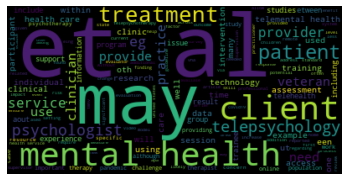

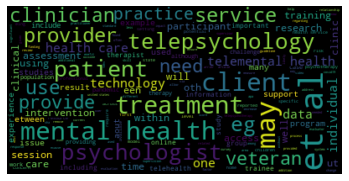

In [61]:
from os import path
from wordcloud import WordCloud
#d = path.dirname("/content/gas_clean.txt"
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_metadata['Content_Clean'].values))
# Display the generated image:
# the matplotlib way:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_metadata['Content_Clean'].values))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



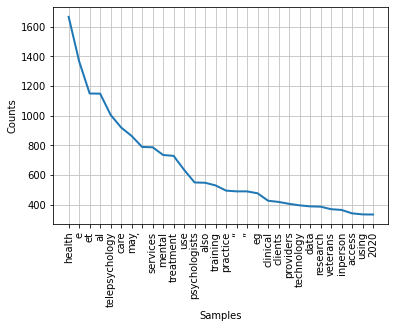

In [68]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 
  
tokenized_word=word_tokenize(' '.join(df_metadata['Content_Clean'].values))
  
filtered_sentence = [w for w in tokenized_word if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in tokenized_word: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(tokenized_word) 
print(filtered_sentence) 

# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sentence)
print(fdist)

# Ten most common words
fdist.most_common(10)

# Frequency Distribution Plots
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#similarity analysis

In [78]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [113]:
text_1 = nlp(df_metadata['Content_Clean'].values[0])
text_2 = nlp(df_metadata['Content_Clean'].values[2])
text_sim = text_1.similarity(text_2)
text_sim

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.975787726163072

In [110]:
similarity_array = np.zeros(shape=(len(df_metadata['Content_Clean']), len(df_metadata['Content_Clean'])))

In [114]:
for i in range(len(df_metadata['Content_Clean'])):          
    for j in range(len(df_metadata['Content_Clean'])):
        similarity_array[i][j] = nlp(df_metadata['Content_Clean'].values[i]).similarity(nlp(df_metadata['Content_Clean'].values[j]))

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if

In [117]:
import pickle

In [118]:
with open("similarity_matrix.data", "wb") as f:
  pickle.dump(similarity_array, f)

In [94]:
pairwise_similarity = reviews_tfidf * reviews_tfidf.T 

In [96]:
pairwise_similarity = pairwise_similarity.data.reshape(44, 44)

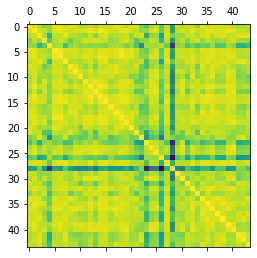

In [115]:
plt.matshow(similarity_array)

In [85]:
import seaborn as sns

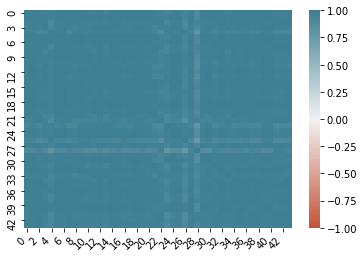

In [116]:
ax = sns.heatmap(
    similarity_array, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(dt[0], dt[1])
len(more_sentences)
pd.DataFrame(cosine_similarity(dt, dt))

# Text Mining - frequency counts of words, length of sentences, presence/absence of specific words

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer, DispersionPlot, PosTagVisualizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


matplotlib.rcParams['figure.figsize'] = (20, 7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


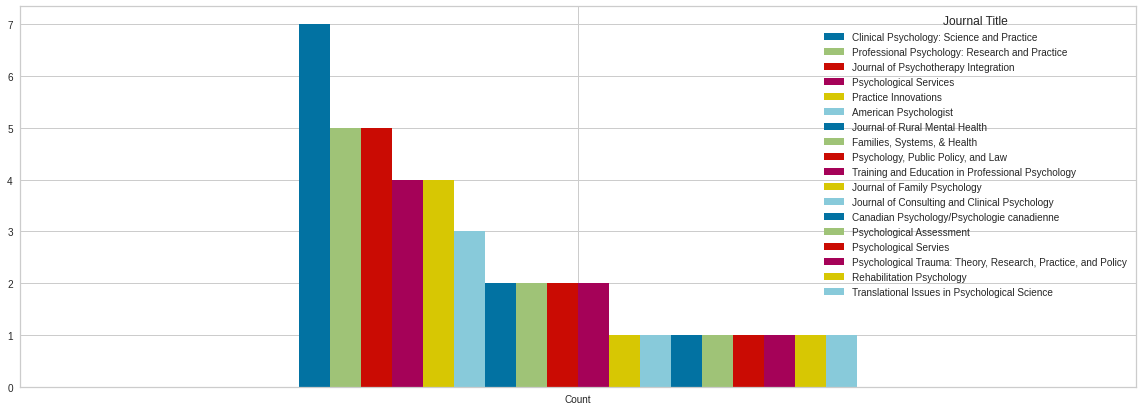

In [ ]:
df_metadata[["Journal Title","Content"]].rename(columns={"Content":"Count"}).groupby("Journal Title").count().sort_values("Count",ascending=False).T.plot(kind="bar")

_ = plt.xticks(rotation=360)

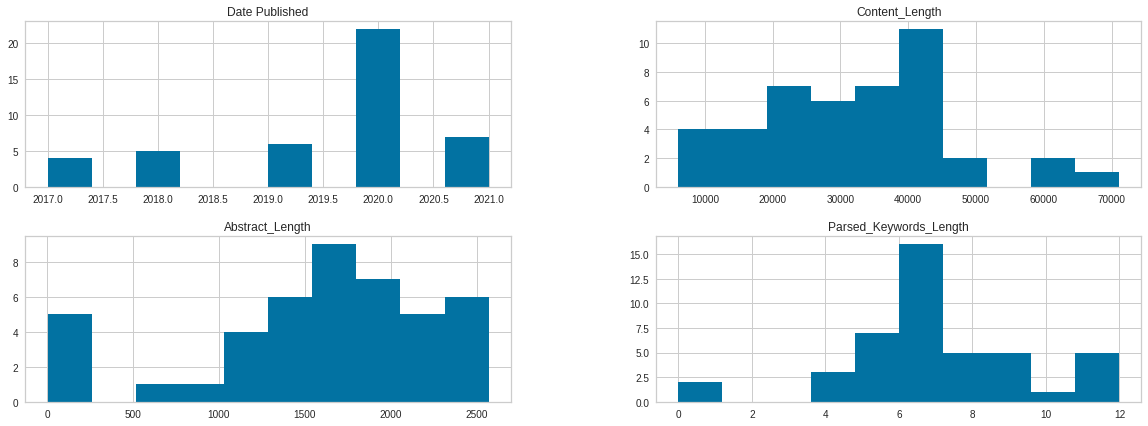

In [ ]:
_ = df_metadata.hist()

In [ ]:
# There are not strong linear correlations between the lengths or Date Published
df_metadata.corr()

,Date Published,Content_Length,Abstract_Length,Parsed_Keywords_Length
Date Published,1.000000,0.210964,0.340628,-0.171761
Content_Length,0.210964,1.000000,0.401089,0.249972
Abstract_Length,0.340628,0.401089,1.000000,0.088227
Parsed_Keywords_Length,-0.171761,0.249972,0.088227,1.000000


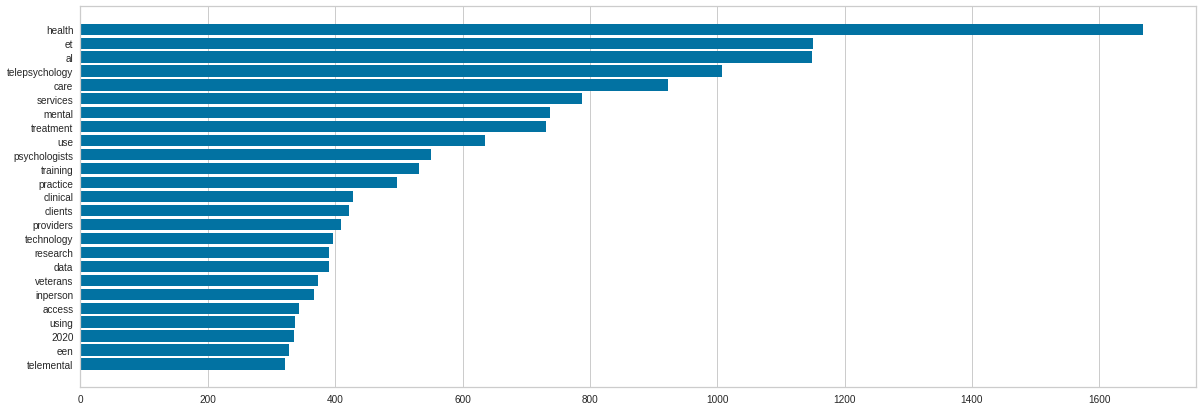

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in df_metadata['Content_Clean'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='H',n=25)
_ = visualizer.fit(docs)

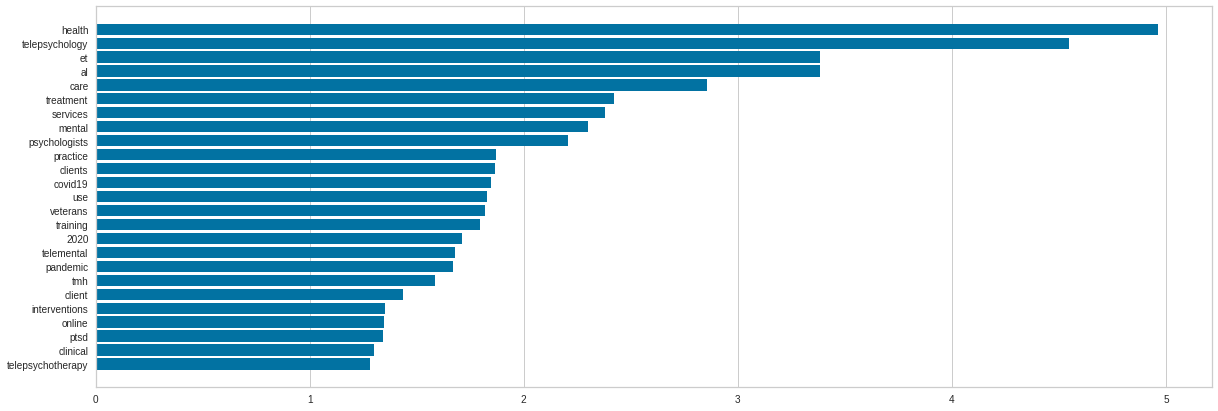

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in df_metadata['Content_Clean'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='H',n=25)
_ = visualizer.fit(docs)

## NLP - Natural Language Processing is one of the components of text mining NLP helps identify sentiments, find entities in the sentence and categories of blogs/articles/posts

## In text analytics, statistical and machine learning algorithms are primarily used to (1) classify, cluster,and summarize information, (2) to perform sentiment analysis, entity extraction and recognition, as well as similarity analysis and relation modeling